# Options
André Guerra \
October, 2022 \
andre.guerra@mail.mcgill.ca \


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# CONSTANTS
# 1. Visualization constants
# a. sizing factors
TICKSFONT = 13
TITLEFONT = 15
TEXTFONT = 15
FIGWIDTH = 6.4
FIGHEIGHT = 4.8
LINEWIDTH = 3
ROLLWINDOW = 100
# b. zoom factors
ZOOMIN = 1.5
ZOOMOUT = 10

## Function definitions

In [2]:
def option_payoff(current_price,strike_price,type):
    """Calculate the payoff from an option

    Args:
        current_price (float): Current stock price at t=T, ST
        strike_price (float): Option strike price, K
        type (string): Option type ['CALL','PUT']

    Returns:
        float: Option payoff
    """
    if type == 'CALL':
        payoff = np.maximum(current_price-strike_price,0)
    elif type == 'PUT':
        payoff = np.maximum(strike_price-current_price,0)
    return payoff

def option_profit(current_price,strike_price,contract_cost,type):
    """Calculate the profit from an option

    Args:
        current_price (float): Current stock price at t=T, ST
        strike_price (float): Option strike price, K
        contract_cost (float): Option contract cost, C (for CALL) or P (for PUT)
        type (string): Option type ['CALL','PUT']

    Returns:
        float: Option profit
    """
    if type == 'CALL':
        profit = np.maximum(current_price-strike_price,0)-contract_cost
    elif type == 'PUT':
        profit = np.maximum(strike_price-current_price,0)-contract_cost
    return profit

def breakeven(strike_price,contract_cost,type):
    """Calculate the breakeven price of an option

    Args:
        strike_price (float): Option strike price, K
        contract_cost (float): Option contract cost, C (for CALL) P (for PUT)
        type (string): Option type ['CALL','PUT']

    Returns:
        float: breakeven
    """
    if type == 'CALL':
        breakeven = strike_price+contract_cost
    elif type == 'PUT':
        breakeven = strike_price-contract_cost
    return breakeven

## Long CALL Option
In a <u>long</u> CALL option, you <u>buy</u> a contract that gives you the <u>right</u> to <u>buy</u> a stock (or underlying asset) for a specified price (strike price, `K`). The CALL option has a price for the contract, `C`, and it has an expiration date, `T`.  

<u>European option</u>: the option holder only has the option of exercising the contract at the expiration date.  
<u>American option</u>: the option holder has the option to exercise the contract at any time between purchase of contract and expiration date.

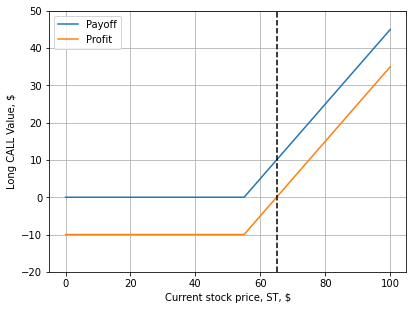

In [3]:
T = 0.25    # contract time length in years
So = 50     # stock price at t0
K = 55      # strike price
C = 10      # CALL contract price

# examine a range of possible stock prices at expiration (t=T)
ST = np.arange(0,105,5)
long_call_payoff = option_payoff(current_price=ST,strike_price=K,type='CALL')
long_call_profit = option_profit(current_price=ST,strike_price=K,
                                 contract_cost=C,type='CALL')
# breakeven
long_call_breakeven = breakeven(strike_price=K,contract_cost=C,type='CALL')

# plot the payoff and profit for the range of stock prices at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(ST,long_call_payoff,ST,long_call_profit)
axs.vlines(long_call_breakeven,-20,50,linestyle='--',color='k')
axs.grid(visible=True)
axs.set_ylim(([-20,50]))
axs.set_ylabel("Long CALL Value, $")
axs.set_xlabel("Current stock price, ST, $")
axs.legend(['Payoff','Profit'])

## Long PUT Option
In a <u>long</u> PUT option, you <u>buy</u> a contract that gives you the <u>right</u> to <u>sell</u> a stock (or underlying asset) for a specified price (strike price, `P`). The PUT option has a price for the contract, `P`, and it has an expiration date, `T`.

<u>European option</u>: the option holder only has the option of exercising the contract at the expiration date.  
<u>American option</u>: the option holder has the option to exercise the contract at any time between purchase of contract and expiration date.

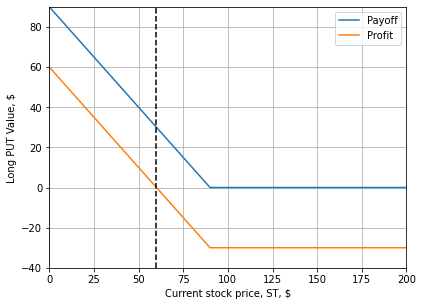

In [4]:
T = 1.5     # contract time length in years
So = 100    # stock price at t=0
K = 90      # strike price
P = 30      # PUT contract cost

# examine a range of possible stock prices at expiration (t=T)
ST = np.arange(0,205,5)
long_put_payoff = option_payoff(current_price=ST,strike_price=K,type='PUT')
long_put_profit = option_profit(current_price=ST,strike_price=K,
                                contract_cost=P,type='PUT')
# breakeven
long_put_breakeven = breakeven(strike_price=K,contract_cost=P,type='PUT')

# plot the payoff and profit for the range of stock prices at expiration
NCOL = 1
NROWS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(ST,long_put_payoff,ST,long_put_profit)
axs.vlines(long_put_breakeven,-40,100,linestyle='--',color='k')
axs.grid(visible=True)
axs.set_ylim([-40,90])
axs.set_xlim([0,200])
axs.set_ylabel("Long PUT Value, $")
axs.set_xlabel("Current stock price, ST, $")
axs.legend(['Payoff','Profit'])

## Short CALL Option
In a short CALL option, you <u>sell</u> a contract in which you have the <u>obligation</u> to <u>buy</u> a stock (or underlying asset) for a specified price (strike price, `K`). Short selling the CALL contract gives you a positive cash flow equal to the contract price, `C`, and it specifies an expiration date. 

The same definitions of European and American options apply here.

The short CALL option is the reflection of the long CALL option. So here we use the `option_payoff()` and `option_profit()` methods defined above with the `CALL` argument, and we take the negative of the return values. The result is vertical reflection of the long CALL option plot.

At ST=160, short CALL payoff: -60
At ST=160, short CALL profit: -40
short CALL breakeven: 120


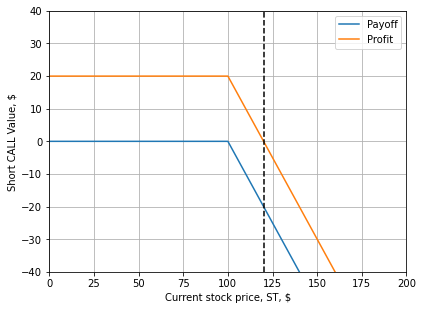

In [5]:
T = 0.5     # contract time length in years
K = 100     # strike price
So = 110    # stock price at t=0
ST = 160    # stock price at t=T
C = 20      # CALL contract cost

# Examine a fixed stock price at expiration (t=T), ST:
short_call_payoff = -option_payoff(current_price=ST,strike_price=K,type='CALL')
short_call_profit = -option_profit(current_price=ST,strike_price=K,
                                   contract_cost=C,type='CALL')
print("At ST=" + str(ST) + ", short CALL payoff: " + str(short_call_payoff))
print("At ST=" + str(ST) + ", short CALL profit: " + str(short_call_profit))
# breakeven
short_call_breakeven = breakeven(strike_price=K,contract_cost=C,type='CALL')
print("short CALL breakeven: " + str(short_call_breakeven))

# examine a range of possible stock prices at expiration (t=T)
ST = np.arange(0,205,5)
short_call_payoff = -option_payoff(current_price=ST,strike_price=K,type='CALL')
short_call_profit = -option_profit(current_price=ST,strike_price=K,
                                   contract_cost=C,type='CALL')

# plot the payoff and profit for the range of stock prices at expiration
NCOL = 1
NROWS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(ST,short_call_payoff,ST,short_call_profit)
axs.vlines(short_call_breakeven,-40,100,linestyle='--',color='k')
axs.grid(visible=True)
axs.set_ylim([-40,40])
axs.set_xlim([0,200])
axs.set_ylabel("Short CALL Value, $")
axs.set_xlabel("Current stock price, ST, $")
axs.legend(['Payoff','Profit'])

## Short PUT Option
In a short PUT option, you <u>sell</u> a contract that gives you the <u>obligation</u> to <u>sell</u> a stock (or underlying asset) for a specified price (strike price, `K`). Short selling the PUT option gives you a positive cash flow equal to the contract price, `P`, and it specifies an expiration date.

The same definitions for European and American options apply here.

The short PUT option is the reflection of the long PUT option. So here we use the `option_payoff()` and `option_profit()` methods defined above with the `PUT` argument, and we take the negative of the return values. The result is vertical reflection of the long PUT option plot.

At ST=5, short PUT payoff: -6
At ST=5, short PUT profit: -2
short PUT breakeven: 7


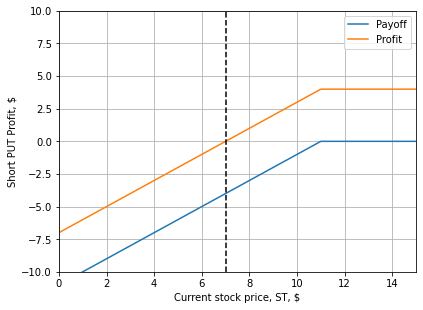

In [6]:
T = 0.5     # contract time length in years
K = 11      # strike price
So = 10     # stock price at t=0
ST = 5      # stock price at t=T
P = 4       # PUT contract cost

# Examine a fixed stock price at expiration (t=T), ST:
short_put_payoff = -option_payoff(current_price=ST,strike_price=K,type='PUT')
short_put_profit = -option_profit(current_price=ST,strike_price=K,
                                  contract_cost=P,type='PUT')
print("At ST=" + str(ST) + ", short PUT payoff: " + str(short_put_payoff))
print("At ST=" + str(ST) + ", short PUT profit: " + str(short_put_profit))
# breakeven
short_put_breakeven = breakeven(strike_price=K,contract_cost=P,type='PUT')
print("short PUT breakeven: " + str(short_put_breakeven))

# examine a range of possible stock prices at expiration (t=T)
ST = np.arange(0,20,1)
short_put_payoff = -option_payoff(current_price=ST,strike_price=K,type='PUT')
short_put_profit = -option_profit(current_price=ST,strike_price=K,
                                  contract_cost=P,type='PUT')

# plot the payoff and profit for the range of stock prices at expiration
NCOL = 1
NROWS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(ST,short_put_payoff,ST,short_put_profit)
axs.vlines(short_put_breakeven,-10,10,linestyle='--',color='k')
axs.grid(visible=True)
axs.set_ylim([-10,10])
axs.set_xlim([0,15])
axs.set_ylabel("Short PUT Profit, $")
axs.set_xlabel("Current stock price, ST, $")
axs.legend(['Payoff','Profit'])
